# Demo de implementación de un algoritmo de Bandadas de Pájaros (Particle Swarm Optimization o PSO) para resolver el problema de encontrar un Máximo Óptimo definido al azar en un plano y tratando de esquivar los máximos locales aleatorios
El código es una adaptación del ejemplo de la librería DEAP disponible en https://deap.readthedocs.io/en/master/ pero no utiliza la librería (no son necesarios los operadores ni clases) y se mejora

1) Importar librerías:

In [ ]:
#@title
import random
import math
import numpy as np
import matplotlib.pyplot as plt

import operator
import copy

import pickle
import codecs

print("\nLibrerías importadas")


Librerías importadas


2) Establecer parámetros generales de la Corrida:

In [ ]:
# Cantidad de Máximos Locales
CANT_MAXIMOS_LOCALES = 3 #@param {type:"slider", min:0, max:10, step:1}

# Espacio mínimo y máximo del espacio de búsqueda
MIN_ESPACIO_BUSQ = -1000 #@param {type:"slider", min:-1000, max:0, step:5}
MAX_ESPACIO_BUSQ = 1000 #@param {type:"slider", min:0, max:1000, step:10}

# Cantidad de Ciclos de la Corrida
CANT_CICLOS = 100 #@param {type:"integer"}

# Cantidad de Particulas
CANT_PARTICULAS = 10 #@param {type:"slider", min:1, max:50, step:1}

# Indica si se muestra el detalle de cada ciclo
MUESTRA_DETALLE = True #@param {type:"boolean"}

print("\nParámetros de la Corrida definidos")


Parámetros de la Corrida definidos


3) Especificar el objeto Particula y la Función Heurística:

In [ ]:
#@title clase MAPA DE BÚSQUEDA
Hash_configuracion_Mapa_Busqueda = "gANjX19tYWluX18KTWFwYUJ1c3F1ZWRhCnEAKYFxAX1xAihYBgAAAGxpbU1pbnEDShj8//9YBgAA AGxpbU1heHEETegDWAcAAABjYW50TWF4cQVLA1gKAAAATWF4aW1vc1Bvc3EGXXEHKF1xCChN3gFK kP///2VdcQkoTRkDSoH///9lXXEKKE0gA0oW/f//ZV1xCyhLhk0KAmVlWAoAAABNYXhpbW9zVmFs cQxdcQ0oS2BLYkshSx1lWAsAAABNYXhPcHRpbW9JRHEOSwF1Yi4=" #@param {type:"string"}

class MapaBusqueda(object):

    def __init__(self, limMin, limMax, cantMaximosLocales=0):
          self.limMin = limMin
          self.limMax = limMax
          self.cantMax = cantMaximosLocales
          self.generarPosicionesRnd()

    def generarPosicionesRnd(self):
      
        # Define Posiciones Random para Máximos Locales y Óptimos
        # con Heurística también al Azar (entre 1 y 100)
        # controla que el máximo local/global no se ubique en la misma posición que el Hormiguero
        self.MaximosPos = []
        self.MaximosVal = []
        self.MaxOptimoID = 0
        auxMejorVal = -99
        i = 0
        while len(self.MaximosPos)<(self.cantMax+1):

            auxPos = [ random.randint(self.limMin, self.limMax),  random.randint(self.limMin, self.limMax) ]        
            auxVal = random.randint(-20, 100)

            self.MaximosPos.append( auxPos )
            self.MaximosVal.append( auxVal )
            
            if self.MaximosVal[self.MaxOptimoID] < auxVal:
                self.MaxOptimoID = i
            i= i + 1

        return True
   
    def printInformacion(self):
        # Muestra la información sobre el Mapa de Búsqueda
        print("\n** Máximos Generados: ", len(self.MaximosPos))
        for auxPos, auxVal in zip(self.MaximosPos, self.MaximosVal):
            print("  -->", auxPos, "{ ", auxVal, " } ")
        print("\n** Posición Máximo Óptimo: ", self.MaximosPos[self.MaxOptimoID], " { ",  self.MaximosVal[self.MaxOptimoID]," } **")
        print("\n")

    @property
    def posMaximos(self):
        return self.MaximosPos    

    @property
    def valMaximos(self):
        return self.MaximosVal   
        
    @property
    def posMaximoGlobal(self):
        return self.MaximosPos[self.MaxOptimoID]         
    
    @property
    def valMaximoGlobal(self):
        return self.MaximosVal[self.MaxOptimoID]  

    def estaEnMaximo(self, posicion):
      # Indica si la posición corresponde o no a un Máximo 
      # si es verdadero devuelve el valor correspondiente, sino 0
      for i in range(len(self.MaximosPos)):
        if posicion==self.MaximosPos[i]:
          return self.MaximosVal[i]
      return 0

    def funcHeuristica(self, posicion):
        # Define la Función Heurística para evaluar una posicion del mapa
        devuelve = 0
        disPosMenor = self.limMax
        for posMax, valMax in zip(self.MaximosPos, self.MaximosVal):

              # calcula la distancia al punto de la Particula
              sqerrors = ((x - y)**2 for x, y in zip(posicion, posMax))
              distPos =  math.fsum(sqerrors)**0.5 / 10
              
              # Si es la menor distancia calcula la Heurística
              if disPosMenor > distPos:
                  disPosMenor = distPos 
                  devuelve = ( valMax - distPos) 

          # Por las dudas controla que devuelva un valor positivo
        return max(devuelve,0)


print("\nClase Mapa de Búqueda definida") 

# si tiene la configuración definida, la carga sino crea nueva clase
if Hash_configuracion_Mapa_Busqueda != "":
  print("\n> Usando configuración de mapa de búsqueda definida en hash.")
  mapa = pickle.loads(codecs.decode(Hash_configuracion_Mapa_Busqueda.encode(), "base64"))
else:
  # sino define el Mapa de Búsqueda nuevo
  print("\n> Creando nuevo mapa de búsqueda.")
  mapa = MapaBusqueda(limMin=MIN_ESPACIO_BUSQ, limMax=MAX_ESPACIO_BUSQ, \
                      cantMaximosLocales=CANT_MAXIMOS_LOCALES)

print("\n> Mapa de búsqueda definido:")
mapa.printInformacion()

print("\n> Hash del mapa de búsqueda definido: ")
print( codecs.encode(pickle.dumps(mapa), "base64").decode() )


Clase Mapa de Búqueda definida

> Usando configuración de mapa de búsqueda definida en hash.

> Mapa de búsqueda definido:

** Máximos Generados:  4
  --> [478, -112] {  96  } 
  --> [793, -127] {  98  } 
  --> [800, -746] {  33  } 
  --> [134, 522] {  29  } 

** Posición Máximo Óptimo:  [793, -127]  {  98  } **



> Hash del mapa de búsqueda definido: 
gANjX19tYWluX18KTWFwYUJ1c3F1ZWRhCnEAKYFxAX1xAihYBgAAAGxpbU1pbnEDShj8//9YBgAA
AGxpbU1heHEETegDWAcAAABjYW50TWF4cQVLA1gKAAAATWF4aW1vc1Bvc3EGXXEHKF1xCChN3gFK
kP///2VdcQkoTRkDSoH///9lXXEKKE0gA0oW/f//ZV1xCyhLhk0KAmVlWAoAAABNYXhpbW9zVmFs
cQxdcQ0oS2BLYkshSx1lWAsAAABNYXhPcHRpbW9JRHEOSwF1Yi4=



In [ ]:
#@title clase PARTICULA

class Particula(object):
    
    def __init__(self, mapa):        
        self.mapa = mapa
        self.pos = [random.randint(self.mapa.limMin, self.mapa.limMax) for _ in range(2)]
        self.valor = self.mapa.funcHeuristica(self.pos)
        self.velocidad = [random.uniform(self.mapa.limMin//10, self.mapa.limMax//10) for _ in range(len(self.pos))]
        

    def _reset(self):
        self.pos = []
        self.valor = -9999
        self.velocidad = []

    @property
    def heuristica(self):
        return round(self.valor, 2)

    @property
    def posicion(self):
        return self.pos   

    def moverse(self, mejorCiclo, mejorCorrida, coefAtraccMejorCiclo=1.5, coefAtraccMejorCorrida=3):
        
        for i in range(len(self.pos)):
              # calcula el desplazamiento (velocidad) en base a la atracción a la mejor del ciclo y global
            ajusteVel = (coefAtraccMejorCiclo * random.uniform(0, 1) * (mejorCiclo.posicion[i]-self.pos[i])) \
                        + (coefAtraccMejorCorrida * random.uniform(0, 1) * (mejorCorrida.posicion[i]-self.pos[i]))
            self.velocidad[i] = self.velocidad[i] + ajusteVel/10

              # ajusta la posición de la partícula (se ajusta la velocidad para que cambie de a poco)
            self.pos[i] = self.pos[i] + int(self.velocidad[i])

              # revisa no haber superado los límites del mapa
            if self.pos[i] < self.mapa.limMin:
                  self.pos[i] = self.mapa.limMin
            elif self.pos[i] > self.mapa.limMax:
                  self.pos[i] = self.mapa.limMax

          # actualiza su heurística
        self.valor = self.mapa.funcHeuristica(self.pos)
        return copy.deepcopy( self.pos )

print("\nClase Particula definida")


Clase Particula definida


4) Ejecutar la corrida del algoritmo mostrando resultados:

In [ ]:
#@title EJECUCIÓN DE LA CORRIDA

# Muestra su información
mapa.printInformacion()

# Determina mínima Heuristica para finalizar el algoritmo
MIN_HEURISTICA_FINALIZAR = mapa.valMaximoGlobal - 1
print("-- Mínima heurística para finalizar la Corrida: ", MIN_HEURISTICA_FINALIZAR, "--")

# vectores auxiliares 
ciclo = 1    
mejorPartCiclo = None
mejorPartCorrida = None
mejorPartCorrida_ciclo = 0
ciclosParticulas = []
ciclosMaxAptitud = []
partPobla = []

# Define la población de las Particulas
ciclosParticulas.append( [] )
for i in range(CANT_PARTICULAS):
  p = Particula(mapa)
  partPobla.append( p ) 
  ciclosParticulas[0].append( copy.deepcopy( p.posicion ) )

# Finaliza cuando llegue a la cantidad de ciclos 
#     o cuando la heurística del mejor sea mayor a un mínimo
while (ciclo < CANT_CICLOS) \
        and ((mejorPartCiclo==None) or mejorPartCorrida.heuristica<MIN_HEURISTICA_FINALIZAR):

    if MUESTRA_DETALLE:
        print("\n-- Ciclo  %i --" % ciclo)        

    # Evalúa las particulas de la población para determinar las mejores 
    rankingParticulas = sorted(partPobla, key=operator.attrgetter('heuristica'), reverse=True)
    mejorPartCiclo = rankingParticulas[0]
    if mejorPartCorrida == None or mejorPartCiclo.heuristica > mejorPartCorrida.heuristica:
        # congela la particula con la mejor posición encontrada en la corrida
        mejorPartCorrida = copy.deepcopy( mejorPartCiclo ) 
        mejorPartCorrida_ciclo = ciclo
    ciclosMaxAptitud.append( rankingParticulas[0].heuristica )

    if MUESTRA_DETALLE:
        print(" Mejor Partícula Ciclo:", mejorPartCiclo.posicion, " { ", mejorPartCiclo.heuristica, " } ")
        print(" Mejor Partícula Corrida:", mejorPartCorrida.posicion, " { ", mejorPartCorrida.heuristica, " } ")

    # Actualiza la posición de las partículas
    ciclosParticulas.append( [] )
    for p in partPobla:
        nuevaPos = p.moverse( mejorPartCiclo, mejorPartCorrida )
        ciclosParticulas[ciclo].append( nuevaPos )

    ciclo = ciclo + 1

print("\n-- Corrida Finalizada en %i ciclos --\n" % ciclo )
print("** Posición Máximo Óptimo a Buscar: ", mapa.posMaximoGlobal, " { ",  mapa.valMaximoGlobal," } **")
print("== Mejor Partícula de la Corrida:", mejorPartCorrida.posicion, " { ", mejorPartCorrida.heuristica, " } ==")


** Máximos Generados:  4
  --> [478, -112] {  96  } 
  --> [793, -127] {  98  } 
  --> [800, -746] {  33  } 
  --> [134, 522] {  29  } 

** Posición Máximo Óptimo:  [793, -127]  {  98  } **


-- Mínima heurística para finalizar la Corrida:  97 --

-- Ciclo  1 --
 Mejor Partícula Ciclo: [730, 187]  {  65.97  } 
 Mejor Partícula Corrida: [730, 187]  {  65.97  } 

-- Ciclo  2 --
 Mejor Partícula Ciclo: [804, 165]  {  68.78  } 
 Mejor Partícula Corrida: [804, 165]  {  68.78  } 

-- Ciclo  3 --
 Mejor Partícula Ciclo: [711, -207]  {  86.54  } 
 Mejor Partícula Corrida: [711, -207]  {  86.54  } 

-- Ciclo  4 --
 Mejor Partícula Ciclo: [602, -63]  {  82.67  } 
 Mejor Partícula Corrida: [711, -207]  {  86.54  } 

-- Ciclo  5 --
 Mejor Partícula Ciclo: [801, -221]  {  88.57  } 
 Mejor Partícula Corrida: [801, -221]  {  88.57  } 

-- Ciclo  6 --
 Mejor Partícula Ciclo: [970, -54]  {  78.85  } 
 Mejor Partícula Corrida: [801, -221]  {  88.57  } 

-- Ciclo  7 --
 Mejor Partícula Ciclo: [1000, -13

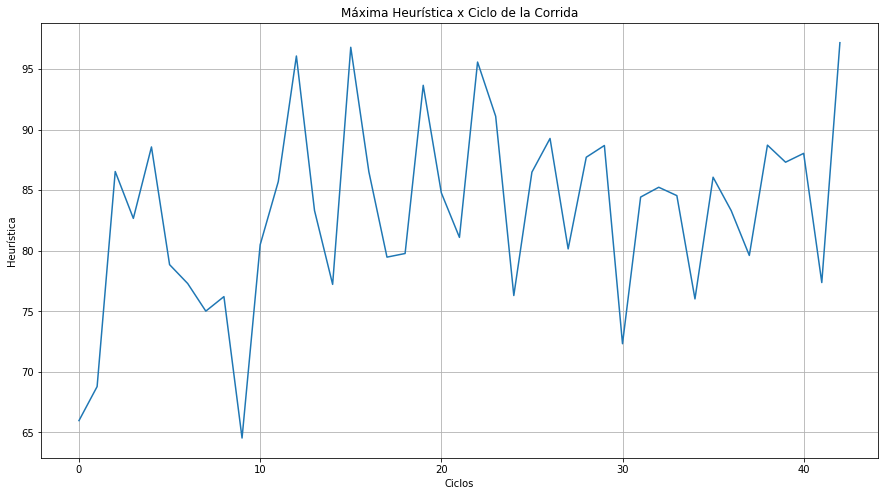

In [ ]:
#@title MOSTRAR GRAFICO DE LA CORRIDA
plt.figure(figsize=(15,8)) 
plt.plot(ciclosMaxAptitud)
plt.title('Máxima Heurística x Ciclo de la Corrida')
plt.xlabel('Ciclos')
plt.ylabel('Heurística')
plt.grid(True)
plt.show()

In [ ]:
#@title MOSTRAR GRAFICO DE POSICIONES DE LAS PARTICULAS CICLO x CICLO

# Librerías especiales para usar
import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML

# método que se usa para generar gradiente de colores
def colorFader(c1, c2, mix=0.0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Método que se ejecuta por cada frame para mostrar 
def updatePlot(i, ciclosPos, scat, axi, posMejorCorrida, cicloMejorCorrida):
    if axi is None or ciclosPos is None:
      return scat,

    axi.set_xlabel('Ciclo: ' + str(i), fontsize=12)
      # Si no es el último ciclo, muestra también el global
    if i<len(ciclosPos):     
      if len(ciclosPos[i])>0:          
          if MOSTRAR_HISTORICO_MOVIMIENTO:
              # Coloca nuevas posiciones correspondientes al ciclo
              # Separa las coordenadas x, y de las posiciones en el ciclo i
              X, Y = zip(*ciclosPos[i])
              ## --en Rojo: posiciones de las particulas de cada ciclo
              axi.scatter(X, Y, color='red')
          else:
              # Hace mover a las Partículas
              scat.set_offsets(ciclosPos[i])              
    
    if i>=cicloMejorCorrida:
      if posMejorCorrida is not None:
          ## --en Violeta: Mejor posición de las partículas
          if len(posMejorCorrida) == 2 and isinstance(posMejorCorrida[0], int) and  isinstance(posMejorCorrida[1], int):
              axi.scatter(posMejorCorrida[0], posMejorCorrida[1], color='violet', s=100)
          else:
              X, Y = zip(*posMejorCorrida)                      
              axi.scatter(X, Y, color='violet', s=100)

    # Devuelve una lista de "artistas" para dibujar, 
    # en este caso es sólo uno por lo que se pone una coma final
    return scat,    

# Función para preparar el gráfico          
def PrepararGrafico(mapa, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ, ciclosPos, partMejorCorrida, cicloMejorCorrida, textoTitulo, textoDesc):          

    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    plt.close()

    ## -- en Azul: Máximos Locales (positivos)
    ## -- en Cyan: Mínimos Locales (negativos)
    ## -- en Verde: Máximo Óptimo
    for posi, vali in zip(mapa.posMaximos, mapa.valMaximos):    
      valRel = abs(vali / mapa.valMaximoGlobal) 
      if vali < 0:        
          c = colorFader('cyan', 'green', valRel) 
          ax.scatter(posi[0], posi[1], color=c)
      else:
          c = colorFader('blue', 'green', valRel) 
          ax.scatter(posi[0], posi[1], color=c)      
    ax.scatter(mapa.posMaximoGlobal[0], mapa.posMaximoGlobal[1], color='green', s=150)    

    # Define el tamaño de la figura
    ax.axis([MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ])

    # Separa las coordenadas x, y de las posiciones en el ciclo inicial
    X, Y = zip(*ciclosPos[0])
    ## --en Rojo: posiciones de las posiciones de cada ciclo
    scat = ax.scatter(X, Y, color='red')

    # Muestra título y texto debajo
    ax.set_title(textoTitulo)
    ax.set_ylabel(textoDesc, fontsize=11)

    # Luego setea la animación usando los dos métodos anteriores 
    cant = len(ciclosPos)+1
    ani = animation.FuncAnimation(fig, updatePlot, 
                                  frames=cant, interval=cant,
                                  fargs=(ciclosPos, scat, ax, partMejorCorrida.posicion, cicloMejorCorrida), 
                                  blit=True, repeat=False)
    
    return ani

# Define la configuración para el gráfico
MOSTRAR_HISTORICO_MOVIMIENTO = False
textoTitulo = "Movimiento de las Partículas de PSO ciclo x ciclo"
textoDesc = '\n** Posición Máximo Óptimo a buscar : ' + str(mapa.posMaximoGlobal) + ' { ' +  str(mapa.valMaximoGlobal) +' } **'
textoDesc = textoDesc + '\n== Mejor Partícula: ' + str(mejorPartCorrida.posicion) + ' { ' + str(mejorPartCorrida.heuristica) + ' } =='
textoDesc = textoDesc + '\n-- Colores:  Máximos Locales (AZUL) - Máximo Óptimo (VERDE) - '  
textoDesc = textoDesc + '\n- Partículas (ROJO) - Mejor Partícula (VIOLETA) -- ' 

# Prepara el gráfico 
ani = PrepararGrafico(mapa, MIN_ESPACIO_BUSQ, MAX_ESPACIO_BUSQ, ciclosParticulas, mejorPartCorrida, mejorPartCorrida_ciclo, textoTitulo, textoDesc)    

# Nota: esto se agega para que funcione en Google Colab
rc('animation', html='jshtml')
display(ani)

In [ ]:
#@title EXPORTA EL GRAFICO ANTERIOR COMO UN VIDEO MP4
Exportar_Video_Animacion = False #@param {type:"boolean"}

if Exportar_Video_Animacion:
    from google.colab import files

      # Graba el gráfico anterior como un video MP4
    nomArchi = "PSO Corrida.mp4"
    ani.save('/' + nomArchi)
    try: 
      files.download('/' + nomArchi)
      print('Video ' + nomArchi + ' generado, debería bajarse automaticamente como un archivo local...')
    except ValueError:
      print('Error al intentar descargar el archivo ' + nomArchi)